In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/ANKIT PC/Desktop/GREAT LEARNING/CAPSTONE PRO/MAIN files/kotak_app_bank_perf_merged_accepted_rejected_with_dpd- 20OCT-2019.csv")

In [3]:
data.head()

,Location_Name,Reference_Number,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Amount,Sanction_Tenure,...,90in9,90in12,90in15,90in18,1.0in6,120in6,120in9,120in12,120in15,120in18
0,Bangalore,#PLZ9V9GNMR,B,Rented with Family,N,INR 32691,400000,5,300000,5,...,0,0,0,0,0,0,0,0,0,0
1,Hyderabad,#PLZ9UERDAS,B,Rented with Family,N,INR 21259,400000,5,380000,3,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,#PLZ9U5SN4A,A,Self Owned,N,INR 117782,100000,4,100000,4,...,0,0,0,0,0,0,0,0,0,0
3,Mumbai,#PLZ9SL4V4K,-,Rented with Friends,N,INR 23000,300000,5,115000,5,...,0,0,0,0,0,0,0,0,0,0
4,Mumbai,#PLZ9RH6ZWD,A,Self Owned,N,INR 39000,250000,5,250000,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data['Location_Name']=data['Location_Name'].replace('Chenna','Chennai').replace('Hydera','Hyderabad').replace('Chandi','Chandigarh').replace('Calcut','Calcutta').replace('Ahmeda','Ahmedabad').replace('-',np.nan)

data['Company_Category']=data['Company_Category'].replace('-',np.nan)

data['Residence_Type']=data['Residence_Type'].replace('-',np.nan)

data['Net_Take_Home']=data['Net_Take_Home'].replace('-',np.nan)
data['Net_Take_Home']=data['Net_Take_Home'].str.replace('INR ',' ')

data['Sanction_Amount']=data['Sanction_Amount'].replace('-',np.nan)

data['Sanction_Tenure']=data['Sanction_Tenure'].replace('-',np.nan)

data['Disbursement_Amount']=data['Disbursement_Amount'].replace('-',np.nan)

data['Disbursement_Date_y']=data['Disbursement_Date_y'].replace('-',np.nan)
data['Disbursement_Date_y']=pd.to_datetime(data['Disbursement_Date_y'])
data['Disbursement_Year']=data['Disbursement_Date_y'].dt.year
data['Disbursement_Month']=data['Disbursement_Date_y'].dt.month
data['Disbursement_Day']=data['Disbursement_Date_y'].dt.day
del data['Disbursement_Date_y']
del data['Disbursement_Date_x']

data['Bank_Name']=data['Bank_Name'].replace('-','Other')

data['Residence_City']=data['Residence_City'].replace('North 24 Pa','North 24 Parganas').replace('Greater Noi','Greater Noida').replace('South 24 Pa','South 24 Parganas').replace('Fatehgarhsa','Fatehgarhsahib').replace('Secunderaba','Secunderabad')

data['System_Approved_Amount']=data['System_Approved_Amount'].replace('-',np.nan)

data['Is_Online_Lead']=data['Is_Online_Lead'].replace('Ye','Yes')

data['cust_loan_type']=data['cust_loan_type'].replace('approved','accepted').replace('unknown','accepted') #since unknown has specific values for sanction amount and sanction tenure kinda values

In [5]:
data.rename(columns={'BALANCE_5TH_DAY_MONTH_1':'Month-1 Day-5'},inplace=True)
data.rename(columns={'BALANCE_10TH_DAY_MONTH_1':'Month-1 Day-10'},inplace=True)
data.rename(columns={'BALANCE_15TH_DAY_MONTH_1':'Month-1 Day-15'},inplace=True)
data.rename(columns={'BALANCE_20TH_DAY_MONTH_1':'Month-1 Day-20'},inplace=True)
data.rename(columns={'BALANCE_25TH_DAY_MONTH_1':'Month-1 Day-25'},inplace=True)
data.rename(columns={'EOM_MONTH_1':'Month-1 End of Month Balance'},inplace=True)
data.rename(columns={'AVG_MONTH_BAL_1':'Month-1 Average Monthly Balance'},inplace=True)

data.rename(columns={'BALANCE_5TH_DAY_MONTH_2':'Month-2 Day-5'},inplace=True)
data.rename(columns={'BALANCE_10TH_DAY_MONTH_2':'Month-2 Day-10'},inplace=True)
data.rename(columns={'BALANCE_15TH_DAY_MONTH_2':'Month-2 Day-15'},inplace=True)
data.rename(columns={'BALANCE_20TH_DAY_MONTH_2':'Month-2 Day-20'},inplace=True)
data.rename(columns={'BALANCE_25TH_DAY_MONTH_2':'Month-2 Day-25'},inplace=True)
data.rename(columns={'EOM_MONTH_2':'Month-2 End of Month Balance'},inplace=True)
data.rename(columns={'AVG_MONTH_BAL_2':'Month-2 Average Monthly Balance'},inplace=True)

data.rename(columns={'BALANCE_5TH_DAY_MONTH_3':'Month-3 Day-5'},inplace=True)
data.rename(columns={'BALANCE_10TH_DAY_MONTH_3':'Month-3 Day-10'},inplace=True)
data.rename(columns={'BALANCE_15TH_DAY_MONTH_3':'Month-3 Day-15'},inplace=True)
data.rename(columns={'BALANCE_20TH_DAY_MONTH_3':'Month-3 Day-20'},inplace=True)
data.rename(columns={'BALANCE_25TH_DAY_MONTH_3':'Month-3 Day-25'},inplace=True)
data.rename(columns={'EOM_MONTH_3':'Month-3 End of Month Balance'},inplace=True)
data.rename(columns={'AVG_MONTH_BAL_3':'Month-3 Average Monthly Balance'},inplace=True)

In [6]:
#renaming for convinience
for i in range(40,90):
    data.rename(columns={data.columns[i]:i},inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95488 entries, 0 to 95487
Data columns (total 93 columns):
Location_Name                      95483 non-null object
Reference_Number                   95488 non-null object
Company_Category                   65416 non-null object
Residence_Type                     95482 non-null object
Negative_Area                      95488 non-null object
Net_Take_Home                      95485 non-null object
Loan_Applied_Amount                95488 non-null int64
Loan_Applied_tenure                95488 non-null int64
Sanction_Amount                    66478 non-null object
Sanction_Tenure                    66478 non-null object
Disbursement_Amount                66327 non-null object
Bank_Name                          95488 non-null object
Residence_City                     90358 non-null object
System_Approved_Amount             90321 non-null object
Is_Online_Lead                     95488 non-null object
cust_loan_type                     954

### Missing Value Treatment

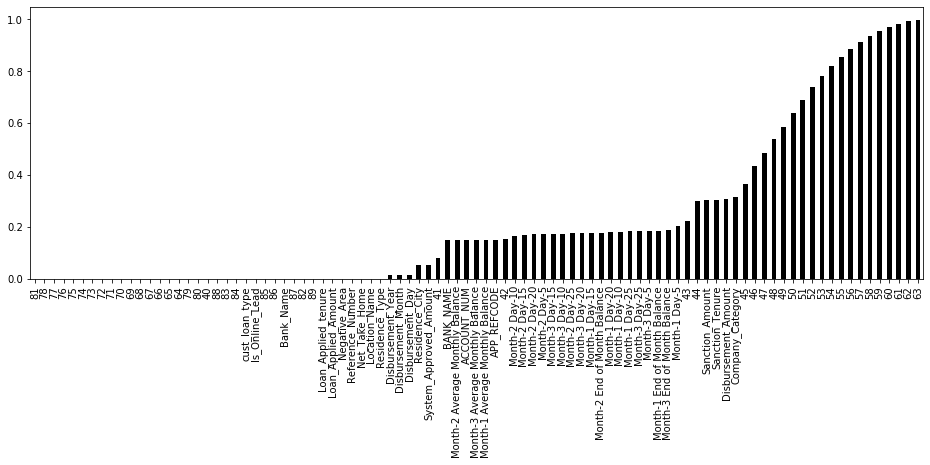

In [8]:
data.isnull().mean().sort_values().plot(kind='bar',figsize=(16,5),color='black')
plt.show()

In [9]:
data.isnull().sum()

Location_Name                          5
Reference_Number                       0
Company_Category                   30072
Residence_Type                         6
Negative_Area                          0
Net_Take_Home                          3
Loan_Applied_Amount                    0
Loan_Applied_tenure                    0
Sanction_Amount                    29010
Sanction_Tenure                    29010
Disbursement_Amount                29161
Bank_Name                              0
Residence_City                      5130
System_Approved_Amount              5167
Is_Online_Lead                         0
cust_loan_type                         0
APP_REFCODE                        14225
Month-1 Day-5                      19438
Month-2 End of Month Balance       16920
Month-2 Day-10                     15850
Month-2 Day-20                     16315
Month-3 End of Month Balance       17899
Month-2 Day-5                      16547
Month-2 Day-25                     16711
Month-1 Average 

In [10]:
data['Location_Name']=data['Location_Name'].fillna(data['Location_Name'].mode()[0])

data['Company_Category']=data['Company_Category'].fillna('Other')

data['Residence_Type']=data['Residence_Type'].fillna(data['Residence_Type'].mode()[0])

data['Net_Take_Home']=data['Net_Take_Home'].fillna(0) # Since the entries are corresponding to 'rejected' category

data['BANK_NAME']=data['BANK_NAME'].fillna('0.0')



data['Disbursement_Year']=data['Disbursement_Year'].fillna(data['Disbursement_Year'].mode()[0])
data['Disbursement_Month']=data['Disbursement_Month'].fillna(data['Disbursement_Month'].mode()[0])
data['Disbursement_Day']=data['Disbursement_Day'].fillna(data['Disbursement_Day'].mode()[0])

In [11]:
data1=data[data['cust_loan_type']=='accepted']
data2=data[data['cust_loan_type']=='rejected']

data2['Sanction_Amount']=0
data2['Sanction_Tenure']=0
data2['Disbursement_Amount']=0
data2['System_Approved_Amount']=0

data=pd.concat([data1,data2])

In [12]:
data1=data[data['BANK_NAME']=='0.0']
data2=data[data['BANK_NAME']!='0.0']

data1['Month-1 Average Monthly Balance']=0
data1['Month-2 Average Monthly Balance']=0
data1['Month-3 Average Monthly Balance']=0
data1['ACCOUNT_NUM']=0
#Othercolumns will be automatically fixed.

data=pd.concat([data1,data2])

In [13]:
#First_Run
def avg_balance_imputation(avg_column,day_5,day_10,day_15,day_20,day_25,month_end_bal):
    list_avg=[]
    for i,v in enumerate(avg_column.isnull()):
        if v==True:
            v=np.mean([day_5[i],day_10[i],day_15[i],day_20[i],day_25[i],month_end_bal[i]])
        else:
            v=avg_column[i]
        list_avg.append(v)
    return list_avg

In [14]:
data['Month-1 Average Monthly Balance']=avg_balance_imputation(data['Month-1 Average Monthly Balance'],
                                                               data['Month-1 Day-5'],data['Month-1 Day-10'],
                                                               data['Month-1 Day-15'],data['Month-1 Day-20'],
                                                               data['Month-1 Day-25'],data['Month-1 End of Month Balance'])


data['Month-2 Average Monthly Balance']=avg_balance_imputation(data['Month-2 Average Monthly Balance'],
                                                               data['Month-2 Day-5'],data['Month-2 Day-10'],
                                                               data['Month-2 Day-15'],data['Month-2 Day-20'],
                                                               data['Month-2 Day-25'],data['Month-2 End of Month Balance'])


data['Month-3 Average Monthly Balance']=avg_balance_imputation(data['Month-3 Average Monthly Balance'],
                                                               data['Month-3 Day-5'],data['Month-3 Day-10'],
                                                               data['Month-3 Day-15'],data['Month-3 Day-20'],
                                                               data['Month-3 Day-25'],data['Month-3 End of Month Balance'])

In [15]:
#Second_Run
def monthly_balance_imputation(column_to_impute,avg_monthly):
    list_monthly=[]
    for i,v in enumerate(column_to_impute.isnull()):
        if v==True:
            v=avg_monthly[i]
        else:
            v=column_to_impute[i]
        list_monthly.append(v)
    return list_monthly

In [16]:
data=data.reset_index()
del data['index']

In [17]:
data['Month-1 Day-5']=monthly_balance_imputation(data['Month-1 Day-5'],data['Month-1 Average Monthly Balance'])
data['Month-1 Day-10']=monthly_balance_imputation(data['Month-1 Day-10'],data['Month-1 Average Monthly Balance'])
data['Month-1 Day-15']=monthly_balance_imputation(data['Month-1 Day-15'],data['Month-1 Average Monthly Balance'])
data['Month-1 Day-20']=monthly_balance_imputation(data['Month-1 Day-20'],data['Month-1 Average Monthly Balance'])
data['Month-1 Day-25']=monthly_balance_imputation(data['Month-1 Day-25'],data['Month-1 Average Monthly Balance'])
data['Month-1 End of Month Balance']=monthly_balance_imputation(data['Month-1 End of Month Balance'],data['Month-1 Average Monthly Balance'])

data['Month-2 Day-5']=monthly_balance_imputation(data['Month-2 Day-5'],data['Month-2 Average Monthly Balance'])
data['Month-2 Day-10']=monthly_balance_imputation(data['Month-2 Day-10'],data['Month-2 Average Monthly Balance'])
data['Month-2 Day-15']=monthly_balance_imputation(data['Month-2 Day-15'],data['Month-2 Average Monthly Balance'])
data['Month-2 Day-20']=monthly_balance_imputation(data['Month-2 Day-20'],data['Month-2 Average Monthly Balance'])
data['Month-2 Day-25']=monthly_balance_imputation(data['Month-2 Day-25'],data['Month-2 Average Monthly Balance'])
data['Month-2 End of Month Balance']=monthly_balance_imputation(data['Month-2 End of Month Balance'],data['Month-1 Average Monthly Balance'])



data['Month-3 Day-5']=monthly_balance_imputation(data['Month-3 Day-5'],data['Month-3 Average Monthly Balance'])
data['Month-3 Day-10']=monthly_balance_imputation(data['Month-3 Day-10'],data['Month-3 Average Monthly Balance'])
data['Month-3 Day-15']=monthly_balance_imputation(data['Month-3 Day-15'],data['Month-3 Average Monthly Balance'])
data['Month-3 Day-20']=monthly_balance_imputation(data['Month-3 Day-20'],data['Month-3 Average Monthly Balance'])
data['Month-3 Day-25']=monthly_balance_imputation(data['Month-3 Day-25'],data['Month-3 Average Monthly Balance'])
data['Month-3 End of Month Balance']=monthly_balance_imputation(data['Month-3 End of Month Balance'],data['Month-1 Average Monthly Balance'])

In [18]:
data['Residence_City']=data['Residence_City'].fillna('Missing')

data1=data[data['Residence_City']=='Missing']
data2=data[data['Residence_City']!='Missing']

data1['Residence_City']=data1['Location_Name']

data=pd.concat([data1,data2])

In [19]:
del data['APP_REFCODE'] #Can be considered if you think it is a useful parameter
del data['Reference_Number']

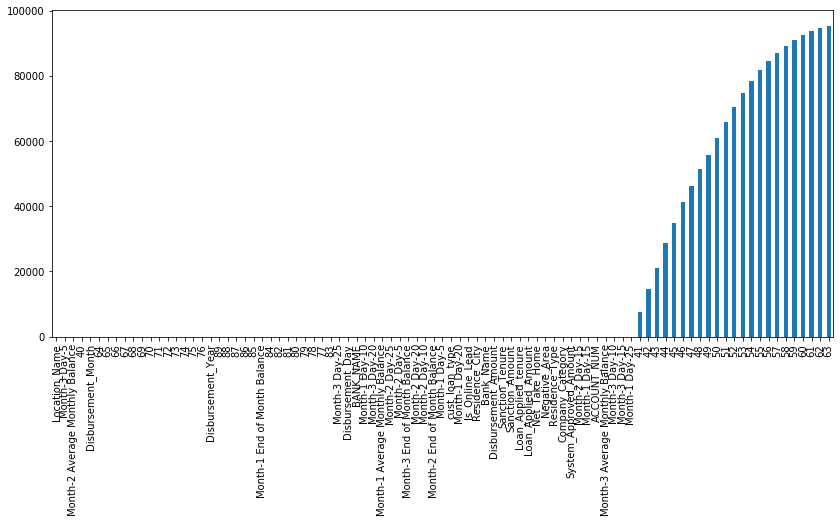

In [20]:
data.isnull().sum().sort_values().plot(kind='bar',figsize=(14,6))

In [21]:
data=data.reset_index()
del data['index']

In [22]:
pd.set_option('display.max_rows',None)
pd.DataFrame((data.isnull().mean()*100).sort_values(ascending=False)).T

,63,62,61,60,59,58,57,56,55,54,...,68,67,66,65,64,Disbursement_Month,40,Month-2 Average Monthly Balance,Month-3 Day-5,Location_Name
0,99.811495,99.158009,98.146364,96.98915,95.379524,93.499707,91.197847,88.527354,85.54897,82.086754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
pd.set_option('display.max_columns',None)
data.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Amount,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,Month-1 Day-5,Month-2 End of Month Balance,Month-2 Day-10,Month-2 Day-20,Month-3 End of Month Balance,Month-2 Day-5,Month-2 Day-25,Month-1 Average Monthly Balance,Month-3 Day-20,Month-1 Day-10,Month-1 Day-20,Month-2 Day-15,Month-1 Day-15,Month-3 Day-15,Month-3 Day-10,Month-3 Average Monthly Balance,ACCOUNT_NUM,BANK_NAME,Month-1 Day-25,Month-3 Day-25,Month-1 End of Month Balance,Month-3 Day-5,Month-2 Average Monthly Balance,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,Delhi,B,Parental,N,62376,700000,5,700000,5,702500,Citibank N.A.,Delhi,700000,No,accepted,3873.666667,3873.666667,1347.166667,1347.166667,3873.666667,1347.166667,1347.166667,3873.666667,737.50000,3873.666667,3873.666667,1347.166667,3873.666667,737.50000,737.50000,737.50000,0.0,0.0,3873.666667,737.50000,3873.666667,737.50000,1347.166667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,22.0
1,Hyderabad,A,Rented with Friends,N,24361,200000,5,150000,1,151800,AXIS Bank,Hyderabad,150000,Yes,accepted,6588.666667,6588.666667,5004.833333,5004.833333,6588.666667,5004.833333,5004.833333,6588.666667,5207.00000,6588.666667,6588.666667,5004.833333,6588.666667,5207.00000,5207.00000,5207.00000,0.0,0.0,6588.666667,5207.00000,6588.666667,5207.00000,5004.833333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,16.0
2,Jaipur,D,Parental,N,20576,300000,5,150000,2,153000,Kotak Mahindra Bank Ltd.,Jaipur,267488,No,accepted,7817.500000,7817.500000,6114.666667,6114.666667,7817.500000,6114.666667,6114.666667,7817.500000,9498.00000,7817.500000,7817.500000,6114.666667,7817.500000,9498.00000,9498.00000,9498.00000,0.0,0.0,7817.500000,9498.00000,7817.500000,9498.00000,6114.666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,30.0
3,Delhi,B,Rented with Family,N,27283,400000,4,400000,4,403000,Kotak Mahindra Bank Ltd.,Delhi,383944,No,accepted,11264.333330,11264.333330,11493.666670,11493.666670,11264.333330,11493.666670,11493.666670,11264.333330,18373.16667,11264.333330,11264.333330,11493.666670,11264.333330,18373.16667,18373.16667,18373.16667,0.0,0.0,11264.333330,18373.16667,11264.333330,18373.16667,11493.666670,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,20.0
4,Mumbai,Other,Parental,N,59425,800000,5,200000,5,201600,AXIS Bank,Mumbai,772525,No,accepted,69400.166670,69400.166670,193475.666700,193475.666700,69400.166670,193475.666700,193475.666700,69400.166670,293212.16670,69400.166670,69400.166670,193475.666700,69400.166670,293212.16670,293212.16670,293212.16670,0.0,0.0,69400.166670,293212.16670,69400.166670,293212.16670,193475.666700,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,2016.0,9.0,27.0


In [24]:
data=data.dropna(axis=1)

In [25]:
pd.set_option('display.max_columns',None)
data.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Amount,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,Month-1 Day-5,Month-2 End of Month Balance,Month-2 Day-10,Month-2 Day-20,Month-3 End of Month Balance,Month-2 Day-5,Month-2 Day-25,Month-1 Average Monthly Balance,Month-3 Day-20,Month-1 Day-10,Month-1 Day-20,Month-2 Day-15,Month-1 Day-15,Month-3 Day-15,Month-3 Day-10,Month-3 Average Monthly Balance,ACCOUNT_NUM,BANK_NAME,Month-1 Day-25,Month-3 Day-25,Month-1 End of Month Balance,Month-3 Day-5,Month-2 Average Monthly Balance,40,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,Delhi,B,Parental,N,62376,700000,5,700000,5,702500,Citibank N.A.,Delhi,700000,No,accepted,3873.666667,3873.666667,1347.166667,1347.166667,3873.666667,1347.166667,1347.166667,3873.666667,737.50000,3873.666667,3873.666667,1347.166667,3873.666667,737.50000,737.50000,737.50000,0.0,0.0,3873.666667,737.50000,3873.666667,737.50000,1347.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,22.0
1,Hyderabad,A,Rented with Friends,N,24361,200000,5,150000,1,151800,AXIS Bank,Hyderabad,150000,Yes,accepted,6588.666667,6588.666667,5004.833333,5004.833333,6588.666667,5004.833333,5004.833333,6588.666667,5207.00000,6588.666667,6588.666667,5004.833333,6588.666667,5207.00000,5207.00000,5207.00000,0.0,0.0,6588.666667,5207.00000,6588.666667,5207.00000,5004.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,16.0
2,Jaipur,D,Parental,N,20576,300000,5,150000,2,153000,Kotak Mahindra Bank Ltd.,Jaipur,267488,No,accepted,7817.500000,7817.500000,6114.666667,6114.666667,7817.500000,6114.666667,6114.666667,7817.500000,9498.00000,7817.500000,7817.500000,6114.666667,7817.500000,9498.00000,9498.00000,9498.00000,0.0,0.0,7817.500000,9498.00000,7817.500000,9498.00000,6114.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,30.0
3,Delhi,B,Rented with Family,N,27283,400000,4,400000,4,403000,Kotak Mahindra Bank Ltd.,Delhi,383944,No,accepted,11264.333330,11264.333330,11493.666670,11493.666670,11264.333330,11493.666670,11493.666670,11264.333330,18373.16667,11264.333330,11264.333330,11493.666670,11264.333330,18373.16667,18373.16667,18373.16667,0.0,0.0,11264.333330,18373.16667,11264.333330,18373.16667,11493.666670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,20.0
4,Mumbai,Other,Parental,N,59425,800000,5,200000,5,201600,AXIS Bank,Mumbai,772525,No,accepted,69400.166670,69400.166670,193475.666700,193475.666700,69400.166670,193475.666700,193475.666700,69400.166670,293212.16670,69400.166670,69400.166670,193475.666700,69400.166670,293212.16670,293212.16670,293212.16670,0.0,0.0,69400.166670,293212.16670,69400.166670,293212.16670,193475.666700,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,2016.0,9.0,27.0


In [26]:
pd.set_option('display.max_rows',None)
pd.DataFrame((data.isnull().mean()*100))

,0
Location_Name,0.0
Company_Category,0.0
Residence_Type,0.0
Negative_Area,0.0
Net_Take_Home,0.0
Loan_Applied_Amount,0.0
Loan_Applied_tenure,0.0
Sanction_Amount,0.0
Sanction_Tenure,0.0
Disbursement_Amount,0.0


### Conversion to Numericals

In [27]:
list(data.select_dtypes(include='object'))

['Location_Name',
 'Company_Category',
 'Residence_Type',
 'Negative_Area',
 'Net_Take_Home',
 'Sanction_Amount',
 'Sanction_Tenure',
 'Disbursement_Amount',
 'Bank_Name',
 'Residence_City',
 'System_Approved_Amount',
 'Is_Online_Lead',
 'cust_loan_type',
 'BANK_NAME']

In [28]:
data['BANK_NAME']=pd.to_numeric(data['BANK_NAME'])

data['Net_Take_Home']=pd.to_numeric(data['Net_Take_Home'])

data['Sanction_Amount']=pd.to_numeric(data['Sanction_Amount'])

data['Sanction_Tenure']=pd.to_numeric(data['Sanction_Tenure'])

data['Disbursement_Amount']=pd.to_numeric(data['Disbursement_Amount'])

data['System_Approved_Amount']=pd.to_numeric(data['System_Approved_Amount'])

In [29]:
data.head()

,Location_Name,Company_Category,Residence_Type,Negative_Area,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Amount,Sanction_Tenure,Disbursement_Amount,Bank_Name,Residence_City,System_Approved_Amount,Is_Online_Lead,cust_loan_type,Month-1 Day-5,Month-2 End of Month Balance,Month-2 Day-10,Month-2 Day-20,Month-3 End of Month Balance,Month-2 Day-5,Month-2 Day-25,Month-1 Average Monthly Balance,Month-3 Day-20,Month-1 Day-10,Month-1 Day-20,Month-2 Day-15,Month-1 Day-15,Month-3 Day-15,Month-3 Day-10,Month-3 Average Monthly Balance,ACCOUNT_NUM,BANK_NAME,Month-1 Day-25,Month-3 Day-25,Month-1 End of Month Balance,Month-3 Day-5,Month-2 Average Monthly Balance,40,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,Delhi,B,Parental,N,62376,700000,5,700000,5,702500,Citibank N.A.,Delhi,700000.0000,No,accepted,3873.666667,3873.666667,1347.166667,1347.166667,3873.666667,1347.166667,1347.166667,3873.666667,737.50000,3873.666667,3873.666667,1347.166667,3873.666667,737.50000,737.50000,737.50000,0.0,0.0,3873.666667,737.50000,3873.666667,737.50000,1347.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,22.0
1,Hyderabad,A,Rented with Friends,N,24361,200000,5,150000,1,151800,AXIS Bank,Hyderabad,150000.0000,Yes,accepted,6588.666667,6588.666667,5004.833333,5004.833333,6588.666667,5004.833333,5004.833333,6588.666667,5207.00000,6588.666667,6588.666667,5004.833333,6588.666667,5207.00000,5207.00000,5207.00000,0.0,0.0,6588.666667,5207.00000,6588.666667,5207.00000,5004.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,16.0
2,Jaipur,D,Parental,N,20576,300000,5,150000,2,153000,Kotak Mahindra Bank Ltd.,Jaipur,267488.0000,No,accepted,7817.500000,7817.500000,6114.666667,6114.666667,7817.500000,6114.666667,6114.666667,7817.500000,9498.00000,7817.500000,7817.500000,6114.666667,7817.500000,9498.00000,9498.00000,9498.00000,0.0,0.0,7817.500000,9498.00000,7817.500000,9498.00000,6114.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,30.0
3,Delhi,B,Rented with Family,N,27283,400000,4,400000,4,403000,Kotak Mahindra Bank Ltd.,Delhi,383943.8349,No,accepted,11264.333330,11264.333330,11493.666670,11493.666670,11264.333330,11493.666670,11493.666670,11264.333330,18373.16667,11264.333330,11264.333330,11493.666670,11264.333330,18373.16667,18373.16667,18373.16667,0.0,0.0,11264.333330,18373.16667,11264.333330,18373.16667,11493.666670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,20.0
4,Mumbai,Other,Parental,N,59425,800000,5,200000,5,201600,AXIS Bank,Mumbai,772525.0000,No,accepted,69400.166670,69400.166670,193475.666700,193475.666700,69400.166670,193475.666700,193475.666700,69400.166670,293212.16670,69400.166670,69400.166670,193475.666700,69400.166670,293212.16670,293212.16670,293212.16670,0.0,0.0,69400.166670,293212.16670,69400.166670,293212.16670,193475.666700,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,2016.0,9.0,27.0


In [30]:
x=data.drop('cust_loan_type',axis=1)
y=data['cust_loan_type']

In [31]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(sparse=False)

In [32]:
data.select_dtypes(include='object').nunique()

Location_Name       15
Company_Category     5
Residence_Type       9
Negative_Area        2
Bank_Name           64
Residence_City      67
Is_Online_Lead       2
cust_loan_type       2
dtype: int64

In [33]:
x1=pd.DataFrame(one.fit_transform(x.select_dtypes(include='object')))
x2=x.select_dtypes(exclude='object')
x=pd.concat([x1,x2],axis=1)

In [34]:
pd.set_option('display.max_columns',None)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,Net_Take_Home,Loan_Applied_Amount,Loan_Applied_tenure,Sanction_Amount,Sanction_Tenure,Disbursement_Amount,System_Approved_Amount,Month-1 Day-5,Month-2 End of Month Balance,Month-2 Day-10,Month-2 Day-20,Month-3 End of Month Balance,Month-2 Day-5,Month-2 Day-25,Month-1 Average Monthly Balance,Month-3 Day-20,Month-1 Day-10,Month-1 Day-20,Month-2 Day-15,Month-1 Day-15,Month-3 Day-15,Month-3 Day-10,Month-3 Average Monthly Balance,ACCOUNT_NUM,BANK_NAME,Month-1 Day-25,Month-3 Day-25,Month-1 End of Month Balance,Month-3 Day-5,Month-2 Average Monthly Balance,40,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,Disbursement_Year,Disbursement_Month,Disbursement_Day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62376,700000,5,700000,5,702500,700000.0000,3873.666667,3873.666667,1347.166667,1347.166667,3873.666667,1347.166667,1347.166667,3873.666667,737.50000,3873.666667,3873.666667,1347.166667,3873.666667,737.50000,737.50000,737.50000,0.0,0.0,3873.666667,737.50000,3873.666667,737.50000,1347.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,22.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24361,200000,5,150000,1,151800,150000.0000,6588.666667,6588.666667,5004.833333,5004.833333,6588.666667,5004.833333,5004.833333,6588.666667,5207.00000,6588.666667,6588.666667,5004.833333,6588.666667,5207.00000,5207.00000,5207.00000,0.0,0.0,6588.666667,5207.00000,6588.666667,5207.00000,5004.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016.0,8.0,16.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20576,300000,5,150000,2,153000,267488.0000,7817.500000,7817.

In [35]:
x.shape

(95488, 224)

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [37]:
x=mm.fit_transform(x)
y=y.map({'accepted':0,'rejected':1})

In [38]:
import scipy
sparse_x=scipy.sparse.csr_matrix(x)

In [39]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=31)

In [40]:
%%time
svd.fit(sparse_x)

Wall time: 4.73 s


TruncatedSVD(algorithm='randomized', n_components=31, n_iter=5,
             random_state=None, tol=0.0)

In [41]:
np.cumsum(svd.explained_variance_ratio_)

array([0.0108757 , 0.09235398, 0.16266856, 0.22163295, 0.27837493,
       0.33244193, 0.38199519, 0.43051172, 0.47785286, 0.52028701,
       0.56018187, 0.59908128, 0.6357056 , 0.6633372 , 0.68899686,
       0.71397599, 0.7345454 , 0.75175325, 0.7687564 , 0.78484739,
       0.80020137, 0.81536631, 0.82827806, 0.84035957, 0.85222782,
       0.86311608, 0.87378562, 0.88327308, 0.89213285, 0.89966544,
       0.90622203])

In [42]:
x=pd.DataFrame(svd.fit_transform(sparse_x))

In [43]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,2.458856,0.482369,-0.194955,0.681362,0.945938,-0.135349,0.214782,0.376687,-0.079725,0.446910,-0.328973,0.178569,0.168823,-0.188393,-0.224278,0.251763,0.099569,0.077048,-0.308427,0.180497,0.059206,-0.108027,-0.188865,0.866203,0.463047,-0.013884,0.011968,-0.019304,-0.079485,-0.041156,-0.227329
1,1.772294,-0.125991,-0.577480,-0.630468,-0.009689,0.027378,-0.023595,-0.035620,0.331294,-0.016600,1.054324,0.492353,0.697238,0.223924,0.095919,0.951840,0.146156,-0.912716,0.160345,-0.131166,0.313773,0.915694,0.587328,-0.115721,0.090491,-0.362882,0.332736,0.010874,-0.092980,0.000940,-0.054208
2,2.307763,0.532273,-0.336065,0.102624,0.252699,0.651193,0.679339,0.080812,0.086659,0.294837,0.212269,-0.149097,-0.084020,-0.403201,0.914520,-0.303100,-0.036243,0.366415,0.231318,-0.014879,0.067157,0.118041,-0.626429,-0.375572,0.446699,0.572029,0.856555,-0.393753,0.044365,-0.118863,-0.063781
3,2.440775,-0.465586,0.187743,0.516067,1.075548,0.230408,0.286153,-0.523932,-0.368431,-0.131550,0.024847,-0.249381,-0.142223,-0.001212,-0.303238,-0.087426,0.152615,0.055974,0.068787,-0.101786,-0.083542,-0.097095,-0.294762,0.051685,0.282292,-0.213377,-0.147576,-0.105132,-0.015614,0.004157,-0.056994
4,2.596626,1.171900,0.115198,0.300978,-0.803060,0.467741,0.206293,-0.013230,-0.424623,0.430821,-0.524273,0.163481,0.139353,0.054840,0.017458,0.826795,0.067702,-0.448012,0.181371,0.062742,-0.459397,0.066126,-0.179727,-0.051543,-0.127866,-0.064406,-0.096324,-0.071120,0.014869,-0.057224,-0.156126


### - End of First Stage of Data Cleaning

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
x,y=smote.fit_sample(x,y)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [66]:
log=LogisticRegressionCV()

In [67]:
log.fit(x_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [68]:
y_pred=log.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

1.0

In [70]:
confusion_matrix(y_test,y_pred)

array([[19977,     0],
       [    0, 19808]], dtype=int64)

In [71]:
confusion_matrix(y_pred,y_test)

array([[19977,     0],
       [    0, 19808]], dtype=int64)

## Trying out different models

In [72]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


log=LogisticRegressionCV()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
xtree=ExtraTreeClassifier()
rf=RandomForestClassifier()
naive_bayes=GaussianNB()
grad_boost=GradientBoostingClassifier()
ada_boost=AdaBoostClassifier()
support_vector_classifier=SVC()
bag=BaggingClassifier()

In [76]:
models=[log,dt,knn,xtree,rf,naive_bayes,grad_boost,ada_boost,support_vector_classifier,bag]
model=['LogisticRegressionCV','Decision tree','K_Nearest_Neighbour','ExtraTree_Classifier','Random_Forest_Classifier','Gaussian_Naive_Bayes','Gradient_Boosting','Adaptive_boosting','Support_vector_classifier','BAGGING']

In [77]:
%%time
results=pd.DataFrame(model,columns=['Models'])
accuracy_val=[]
accuracy_test=[]
TP_Test=[]
TP_Val=[]
TN_Test=[]
TN_Val=[]
Alpha_Test=[]
Alpha_Val=[]
Beta_Test=[]
Beta_Val=[]
for i in models:
    i.fit(x_train,y_train)
    y_pred_val=i.predict(x_val)
    accuracy_val.append(accuracy_score(y_val,y_pred_val))
    TP_Val.append(confusion_matrix(y_val,y_pred_val)[0][0])
    TN_Val.append(confusion_matrix(y_val,y_pred_val)[1][1])
    Alpha_Val.append(confusion_matrix(y_val,y_pred_val)[1][0])
    Beta_Val.append(confusion_matrix(y_val,y_pred_val)[0][1])
    y_pred_test=i.predict(x_test)
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
    TP_Test.append(confusion_matrix(y_test,y_pred_test)[0][0])
    TN_Test.append(confusion_matrix(y_test,y_pred_test)[1][1])
    Alpha_Test.append(confusion_matrix(y_test,y_pred_test)[1][0])
    Beta_Test.append(confusion_matrix(y_test,y_pred_test)[0][1])
results['Accuracy_Validation']=accuracy_val
# results['TruePositive_Validation']=TP_Val
# results['TrueNegative_Validation']=TN_Val
results['Alpha_Validation']=Alpha_Val
results['Beta_Validation']=Beta_Val
results['Accuracy_Test']=accuracy_test
# results['TruePositive_Test']=TP_Test

# results['TrueNegative_Test']=TN_Test

results['Alpha_Test']=Alpha_Test

results['Beta_Test']=Beta_Test

Wall time: 4min 51s


In [78]:
results

,Models,Accuracy_Validation,Alpha_Validation,Beta_Validation,Accuracy_Test,Alpha_Test,Beta_Test
0,LogisticRegressionCV,1.000000,0,0,1.000000,0,0
1,Decision tree,0.987109,141,218,0.987131,230,282
2,K_Nearest_Neighbour,0.977055,128,511,0.976373,178,762
3,ExtraTree_Classifier,0.979173,223,357,0.979138,314,516
4,Random_Forest_Classifier,0.995440,31,96,0.995149,51,142
5,Gaussian_Naive_Bayes,0.955187,145,1103,0.955787,225,1534
6,Gradient_Boosting,0.989838,10,273,0.989896,16,386
7,Adaptive_boosting,0.990592,33,229,0.991529,34,303
8,Support_vector_classifier,1.000000,0,0,1.000000,0,0
9,BAGGING,0.992711,69,134,0.993138,106,167


In [80]:
##knn
knn = KNeighborsClassifier ( )
knn.fit ( x_train , y_train )
knn_pred_train = knn.predict ( x_train )
knn_pred_test = knn.predict ( x_test )
cm = confusion_matrix ( y_test , knn_pred_test )
print ( "Train score:" , round ( accuracy_score ( y_train , knn_pred_train ) , 3 ) )
print ( "Test score:" , round ( accuracy_score ( y_test , knn_pred_test ) , 3 ) )
print ( "Test Classification Report:\n" , classification_report ( y_test , knn_pred_test ) )
print ( "Test Confusion Matrix:\n" , cm )

Train score: 0.986
Test score: 0.976
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     19977
           1       0.96      0.99      0.98     19808

    accuracy                           0.98     39785
   macro avg       0.98      0.98      0.98     39785
weighted avg       0.98      0.98      0.98     39785

Test Confusion Matrix:
 [[19215   762]
 [  178 19630]]


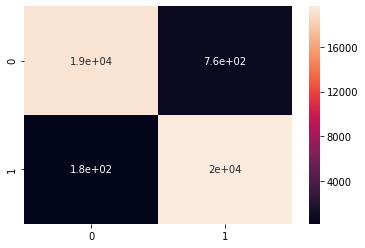

In [82]:
sns.heatmap(cm,annot=True)

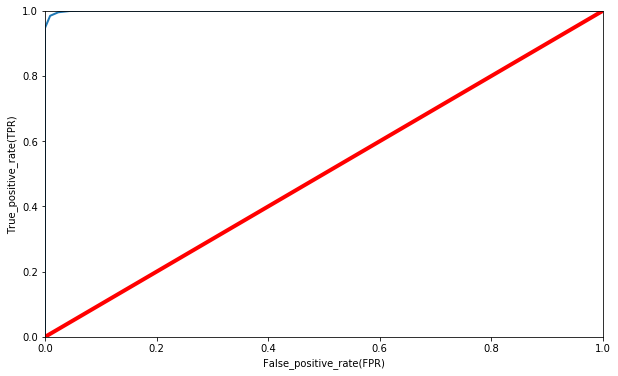

ROC_AUC_SCORES 0.999468130876327


In [84]:
from sklearn.metrics import roc_curve
y_scores=knn.predict_proba(x_train)
y_scores=y_scores[:,1]

#compute true positive rate and false positive rate
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_train,y_scores)
#plotting them against each other
def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False_positive_rate(FPR)')
    plt.ylabel('True_positive_rate(TPR)')
    
plt.figure(figsize=(10,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

from sklearn.metrics import roc_auc_score
r_a_score=roc_auc_score(y_train,y_scores)
print('ROC_AUC_SCORES',r_a_score)

In [87]:
# # Model complexity
# neig = np.arange(1,50)
# train_accuracy = []
# test_accuracy = []
# # Loop over different values of k
# for i, k in enumerate(neig):
#     # k from 1 to 25(exclude)
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # Fit with knn
#     knn.fit(x_train,y_train)
#     #train accuracy
#     train_accuracy.append(knn.score(x_train, y_train))
#     # test accuracy
#     test_accuracy.append(knn.score(x_test, y_test))

# # Plot
# plt.figure(figsize=[13,8])
# plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
# plt.plot(neig, train_accuracy, label = 'Training Accuracy')
# plt.legend()
# plt.title('Value VS Accuracy',fontsize=20)
# plt.xlabel('Number of Neighbors',fontsize=20)
# plt.ylabel('Accuracy',fontsize=20)
# plt.xticks(neig)
# plt.grid()
# plt.show()
# print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
# ##we want generalized model for test data so check blue line  where it is increasing at 18...train data will check all the nearest distance for all 
# # and whichever it will be having nearest will give test data i..e datapoints

#### Note : Consider this as the first initial analysis on the data provided, there are many logical mistakes I could find after implementing the first base model on  the data after cleaning. This is the complete work from my side till this point.

## END